# **Investigation 0**

Investigation 0: apply sentence representation methods on all three dataset ( consider equal nom of samples say 500-1000 and, same method for each of them ) compare each pairwise and all together distribution similarly. Use tsne visualization



Z-Test : http://homework.uoregon.edu/pub/class/es202/ztest.html

Difference between Z-test and t-test: Z-test is used when sample size is large (n>50), or the population variance is known. t-test is used when sample size is small (n<50) and population variance is unknown. (source: Wikipedia).

Z-score: No. Of standard deviation a particular data point is away from the population mean.

Z = (x - µ)/s

To compare using z-test we can assume that all the distributions are close to normal distributions and find out the difference between them. (Remember: To make sense of the z-value we need to check the normal distribution z-score table).

T-test:

If you apply the t-test to non-normal data, you are probably increasing the risk of error. Now, in fact, the Central Limit Theorem shows that the t-test can avoid becoming unusually error-prone when applied to non-normal datasets if the datasets are sufficiently "large" the t-test does not lie outrageously even when applied to non-normal data. Thus, the t-test is called a "robust" test, since it continues to work well in situations different from those narrow situations for which it was created. This is important because users of statistical tests often do not know if their dataset meets the criteria intended by the creator of the statistical test.

For larger datasets (say N>40), the Central Limit Theorem suggests that the t-test will produce valid results even in the face of non-normally distributed data. However, highly non-normal datasets can cause the t-test to produce wrong results, even for large N datasets. In the last example you will see a case where the t-test fails at N=80.

T-test fails in situations like:

Data is normally distributed with same mean but different variance.

If the dataset is small (<40) and it is non-normal.

Kolmogorov-Smirnov test:

It works only for continuous distribution.

It calculates the difference between two datasets without forming any assumption about the dataset.

It can decide what kind of distribution a particular dataset belong to. For a dataset it will assume a distribution and calculate the parameters of that distribution using the dataset. Then it will calculate the similarity (distance or deviation – d) and the p-value between the dataset and the assumed distribution. This process is repeated for all the distribution. The one with the lowest distance is considered as the distribution which the dataset follows.

For calculating the distance KS-test calculates the cumulative fraction plot for both the dataset and find the maximum deviation between them.

Anderson-Darling statistic (AD):

Unsupervised Clustering:


# **Start**

In [ ]:
#upload March.csv
from google.colab import files

uploaded = files.upload()

Saving March.csv to March.csv


In [ ]:
#Installation
pip install statsmodels --upgrade-strategy only-if-needed
pip install --upgrade numpy
!pip install bert-embedding
!wget "https://raw.githubusercontent.com/syrte/ndtest/master/ndtest.py"

In [ ]:
#importing only
import random
import pandas as pd
import numpy as np

import statsmodels.stats.weightstats
from scipy import stats
from ndtest import *
from sklearn.decomposition import PCA

random.seed(0)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dranzerblaze/covid19worry/master/files_clean/data_incl_demographics.csv')

In [ ]:
tw_covid=pd.read_csv("March.csv")

In [ ]:
tw_covid.head()

,Date,User_ID,Location,Text
0,2020-03-1,daniel_y_chan,London,"Aidan Sutton, @PwC_UK Partner and Head of Char..."
1,2020-03-1,PaulOakleyDj,England,Went out on my first #Events job since the #Co...
2,2020-03-1,RAINBOWBLAK,LONDON UK,Best thing to come out of the Covid19 lockdown...
3,2020-03-1,neilpatterson36,Portsmouth,Fingers crossed #COVID19 BBC News - Coronavir...
4,2020-03-1,jonnywoo34,"Essex, UK",This gormless cunt is our actual Prime Ministe...


In [ ]:
df.head()

,Unnamed: 0,V1,worry,chosen_emotion,anger,disgust,fear,anxiety,sadness,happiness,relaxation,desire,text_long,timing_textlong_firstclick,timing_textlong_lastclick,timing_textlong_submit,timing_textlong_nclicks,text_short,timing_textshort_firstclick,timing_textshort_lastclick,timing_textshort_submit,timing_textshort_nclicks,self_rating_general,self_rating_short,self_rating_long,twitter_general_often,twitter_tweet_often,twitter_participate_often,eng_native,ntok_long,nchar_long,ntok_short,nchar_short,cld_lang_long,cld_lang_short,id,n_punct,prop_punct,age,Country of Birth,Current Country of Residence,Employment Status,First Language,Nationality,Sex,Social-Media,Student Status
0,1,1,3,Sadness,5,5,3,7,7,2,4,5,It is less an much an issue of how it affects ...,4.340,150.638,202.320,12,It is very easy! Stay inside so you are not sp...,5.510,5.510,61.123,1,7,7,7,7,1,1,Yes,110,592,40,183,en,en,1815,9,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,8,Anxiety,6,7,7,8,6,4,3,1,I am concerned that the true impact of the cur...,3.924,615.838,621.392,24,"Things are difficult now, but we must all pull...",76.067,76.067,78.729,1,9,4,8,6,3,4,Yes,257,1424,43,221,en,en,401,16,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,4,Relaxation,1,1,2,2,4,7,7,2,"Personally, I am fairly calm about the corona ...",116.183,734.382,735.286,22,"People should try and remain calm, as panic wi...",1345.874,1345.874,1398.381,1,7,6,8,9,2,4,No but I speak it fluently,132,631,15,78,en,en,25,10,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,6,Relaxation,4,2,3,4,1,6,7,3,In this very moment as I am fortunate to be ab...,1.016,137.120,171.076,18,Fortunate to feel calm and relaxed but worried...,3.865,42.945,46.675,4,8,6,9,8,6,3,Yes,132,713,22,141,en,en,1585,12,0.02,28.0,Belgium,United Kingdom,Full-Time,English,France,Female,"Facebook, Youtube, Twitter, Linkedin",No
4,5,5,6,Anxiety,2,2,5,5,5,4,4,4,I am more worried about getting access to my n...,3.084,313.848,317.264,5,Not being able to cuddle my family sucks!,7.762,7.762,25.759,1,8,8,8,9,9,5,Yes,132,662,9,41,en,en,1207,13,0.02,57.0,United Kingdom,United Kingdom,"Not in paid work (e.g. homemaker', 'retired or...",English,United Kingdom,Female,Youtube,No


In [ ]:
X_worry=df['text_short']
X_worry.shape

(2491,)

In [ ]:
X_twicovid=tw_covid['Text']
X_twicovid.shape

(1085,)

In [ ]:
X=pd.concat([X_worry, X_twicovid], ignore_index=True, sort=False)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
vectorizer.fit(X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
pca = TruncatedSVD(n_components=18)
pca.fit(vectorizer.fit_transform(X))

TruncatedSVD(algorithm='randomized', n_components=18, n_iter=5,
             random_state=None, tol=0.0)

In [ ]:
X1=pca.transform(vectorizer.transform(X_worry))

In [ ]:
X2=pca.transform(vectorizer.transform(X_twicovid))

In [ ]:
t,Z=np.array(statsmodels.stats.weightstats.ztest(X1,X2,X1.mean()-X2.mean()))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **New experiment**

In [ ]:
vectorizer1 = TfidfVectorizer(max_features=1000)
pca1 = TruncatedSVD(n_components=18)
X1=pca1.fit_transform(vectorizer1.fit_transform(X_worry))

In [ ]:
vectorizer2 = TfidfVectorizer(max_features=1000)
pca2 = TruncatedSVD(n_components=18)
X2=pca2.fit_transform(vectorizer2.fit_transform(X_twicovid))

In [ ]:
pca=PCA(n_components=.95,svd_solver='full')
h1=pca.fit_transform(X1)

In [ ]:
h1.shape

(2491, 17)

In [ ]:
# ks2d2s(X1,X1,X2,X2,extra=True)

## **2.Sentence representation**

In [ ]:
from bert_embedding import BertEmbedding

In [ ]:
bert = BertEmbedding()

In [ ]:
def sentence2vec(l=['i','am']):
  """Conversion of sentence to vector of 768 dimension(bert based)
    Input: list
    Output: ndarray of size (768,)
  """
  v1=bert(l)
  ans=np.zeros((1,768))
  for a,b in v1:
    if(ans.shape==np.array(b).shape):
      ans=ans+b;
  ans=ans/len(v1)
  return ans.squeeze()

### **Tokenizer made by Harsh Mishra**

In [ ]:
import numpy as np
import pandas as pd
!pip install emoji --quiet
import emoji #To convert emoji to their word expressions
import re, string, unicodedata
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
!pip install contractions --quiet
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

     |████████████████████████████████| 51kB 1.7MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 245kB 3.6MB/s 
     |████████████████████████████████| 317kB 16.3MB/s 


In [ ]:
def remove_https(text):
    return re.sub(r'http\S+', '', text)

def remove_hashtags_and_save(text):
    return re.sub(r'#\S+', '', text)

def findall_hashtags(text):
    return re.findall(r'#\S+',text)

def convert_emozi_to_word(text):
    return emoji.demojize(text)

def replace_contractions(text):
    return contractions.fix(text)

def text_has_emoji(text):
    for character in text:
        if character in emoji.UNICODE_EMOJI:
            return emoji.demojize(character)
    return None    

def denoise_text_and_replace_contraction(text):
    text = remove_https(text)
    if text_has_emoji(text) is not None:
        text=[convert_emozi_to_word(replace_contractions(remove_hashtags_and_save(text))),text_has_emoji(text),findall_hashtags(text)]
    else:
        text=[replace_contractions(remove_hashtags_and_save(text)),'None',findall_hashtags(text)]
    return text


In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

In [ ]:
def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems, lemmas

In [ ]:
def fully_preprocessed(collection):
    preprocessed=[]
    for i in collection:
        sample=denoise_text_and_replace_contraction(i)
        words=nltk.word_tokenize(sample[0])
        words=normalize(words)
        stems, lemmas = stem_and_lemmatize(words)
        preprocessed.append([stems,lemmas,sample[1],sample[2]])
    return preprocessed

### **Data preprocessing**

In [ ]:
T1=list(df['text_long'].iloc[0:100])

In [ ]:
# T1_clean=pd.DataFrame(fully_preprocessed(T1),columns=['stems','lemmas','emoji_used','Hashtags_used'])

### **Preprocessing Code Snippet of Harsh Bhamore**

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_text(text):
  text = text.lower()
  text = REPLACE_BY_SPACE_RE.sub(' ' , text)
  text = BAD_SYMBOLS_RE.sub('',text)
  text = ' '.join(word for word in text.split() if word not in STOPWORDS)
  return text

### **Data preprocessing**

In [ ]:
df['text_long1'] = df['text_short'].apply(clean_text)

In [ ]:
# df['text_long'] = df['text_long'].str.replace('\d+' ,'')

In [ ]:
df['text_long_list']=df['text_long1'].apply(lambda x: x.split())

In [ ]:
df['text_long_list']

0       [easy, stay, inside, spreading, vulnerable, pe...
1       [things, difficult, must, pull, together, get,...
2       [people, try, remain, calm, panic, make, situa...
3       [fortunate, feel, calm, relaxed, worried, long...
4                           [able, cuddle, family, sucks]
                              ...                        
2486    [dont, worry, everyone, nearing, light, end, t...
2487                      [wish, speedy, recovery, boris]
2488                [please, stay, home, keep, us, alive]
2489    [people, still, believe, okay, leave, outside,...
2490                                              [worst]
Name: text_long_list, Length: 2491, dtype: object

In [ ]:
t=df['text_long_list'][:500].apply(lambda x: sentence2vec(x))

In [ ]:
d=pd.read_csv("March.csv")

In [ ]:
d['TextC'] = d['Text'].apply(clean_text)

In [ ]:
d['TextCL']=d['TextC'].apply(lambda x: x.split())

In [ ]:
t2=d['TextCL'][:500].apply(lambda x: sentence2vec(x))

## **Apply Test**

In [ ]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns
sns.set()

In [ ]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [ ]:
from scipy.stats import entropy

In [ ]:
import numpy as np
p=list(t)

In [ ]:
p1=[]
for i in p:
  p1.append(list(i))

In [ ]:
q=list(t2)
q1=[]
for i in q:
  q1.append(list(i))

In [ ]:
p_final=np.array(p1).flatten()

In [ ]:
q_final=np.array(q1).flatten()

In [ ]:
p_final.shape

In [ ]:
import statsmodels.stats.weightstats
Z_stat,pval=statsmodels.stats.weightstats.ztest(p_final,q_final,p_final.mean()-q_final.mean())

In [ ]:
print("pvalue:")
print(Z_stat)
print(pval)
if(Z_stat<2):
   print("Similar")

In [ ]:
X1=p_final.mean()

In [ ]:
X2=q_final.mean()

In [ ]:
sigma1=p_final.std()/(50**(1/2))

In [ ]:
sigma2=q_final.std()/(50**(1/2))

In [ ]:
Z=(X2-X1)/((sigma1**2+sigma2**2)**(1/2))

In [ ]:
Z

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
sns.distplot(p_final)

In [ ]:
sns.distplot(q_final)

In [ ]:
stats.ttest_ind(p_final,q_final)

In [ ]:
stats.ks_2samp(p_final,q_final)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca= PCA(n_components=20)

### **T-SNE**

In [ ]:
a1=pca.fit_transform(p1)

In [ ]:
a2=pca.fit_transform(q1)

In [ ]:
from sklearn.manifold import TSNE
b1=TSNE(2).fit_transform(a1)
b2=TSNE(2).fit_transform(a2)

In [ ]:
df_w=pd.DataFrame(b1,columns=["tsne-2d-one","tsne-2d-two"])

In [ ]:
df_w['class']='w'

In [ ]:
df_w['y']=df['chosen_emotion'][:500]

In [ ]:
df_t=pd.DataFrame(b2,columns=["tsne-2d-one","tsne-2d-two"])

In [ ]:
df_t['class']='tc'

In [ ]:
df_c=pd.concat([df_w,df_t],ignore_index=True)

In [ ]:
df_c.tail()

,tsne-2d-one,tsne-2d-two,class
995,-6.638347,-18.909075,tc
996,-9.295521,-35.477833,tc
997,0.844486,3.992291,tc
998,-5.480827,-13.049593,tc
999,2.137691,-5.927772,tc


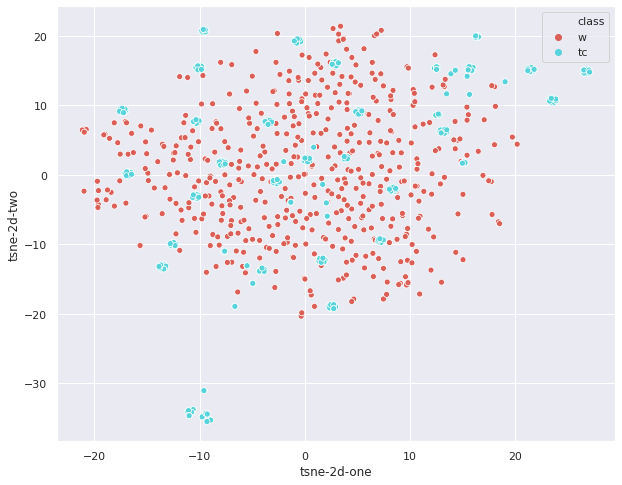

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="class",
    palette=sns.color_palette("hls", 2),
    data=df_c,
    legend="full",
    alpha=1
)

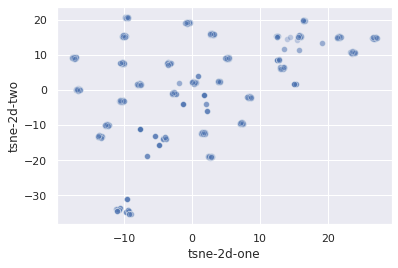

In [ ]:
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    # hue="y",
    # palette=sns.color_palette("hls", 10),
    data=df_t,
    legend="full",
    alpha=0.3
)

In [ ]:
pcat1=PCA(2)
result=pcat1.fit_transform(p1)

In [ ]:
df_w["pca-one"]=result[:,0]
df_w["pca-two"]=result[:,1]

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 8),
    data=df_w,
    legend="full",
    alpha=0.3
)

### **Test result**

In [ ]:
ks2d2s(df_w['tsne-2d-one'],df_w['tsne-2d-two'],df_t['tsne-2d-one'],df_t['tsne-2d-two'],extra='True')

In [ ]:
# d_table=1.35810/sqrt(n) 5% significance level

In [ ]:
d_val=1.35810/(500**(1/2))

In [ ]:
if(d_val<0.211):
  print("reject hypothesis")

In [ ]:
t.to_csv("worry.csv")
t2.to_csv("covid.csv")

## **3. Twitter Emotion**

In [ ]:
#upload Emotion 4 files viz. joy.tsv sadness.tsv fear.csv anger.csv
from google.colab import files
uploaded = files.upload()

Saving sadness.tsv to sadness.tsv
Saving joy.tsv to joy.tsv
Saving fear.tsv to fear.tsv
Saving anger.tsv to anger.tsv


In [ ]:
df_sadness=pd.read_csv("sadness.tsv",sep="\t",names=['ID','Text','chosen_emotion','Intensity'])
df_joy=pd.read_csv("joy.tsv",sep="\t",names=['ID','Text','chosen_emotion','Intensity'])
df_fear=pd.read_csv("fear.tsv",sep="\t",names=['ID','Text','chosen_emotion','Intensity'])
df_anger=pd.read_csv("anger.tsv",sep="\t",names=['ID','Text','chosen_emotion','Intensity'])

In [ ]:
df_twitter_emotion=pd.concat([df_sadness,df_joy,df_fear,df_anger])

In [ ]:
df_twitter_emotion.tail()

,ID,Text,chosen_emotion,Intensity
852,10852,rose incense are the best thing I've ever bought,anger,0.125
853,10853,@jaaames1993 Literally burst out laughing.,anger,0.067
854,10854,Follow up. Follow through. Be . #success,anger,0.125
855,10855,Wrinkles should merely hide where frown have b...,anger,0.125
856,10856,Love the new song I can't stop thinking about ...,anger,0.083


**Equal No of sample each class**

In [ ]:
sample_size=125

In [ ]:
df_twitter_emotion_sample=df_twitter_emotion.groupby('chosen_emotion').apply(lambda x: x.sample(sample_size))

In [ ]:
df_twitter_emotion_sample['Text_cleaned']=df_twitter_emotion_sample['Text'].apply(lambda x: clean_text(x))

In [ ]:
df_twitter_emotion_sample['Text_listed']=df_twitter_emotion_sample['Text_cleaned'].apply(lambda x: x.split())

In [ ]:
df_twitter_emotion_sample.head()

ID  ...                                        Text_listed
chosen_emotion             ...                                                   
anger          604  10604  ...  [everycolorbot, like, every, color, looks, #tr...
               838  10838  ...  [vale, vale, sip, sangria, taste, tantalizing,...
               415  10415  ...                            [think, may, #offended]
               105  10105  ...  [complain, time, wonder, people, never, want, ...
               828  10828  ...  [love, #girls, busy, teaching, #pout, taking, ...

[5 rows x 6 columns]

In [ ]:
df_twitter_emotion_sample['Text2vec']=df_twitter_emotion_sample['Text_listed'].apply(lambda x: sentence2vec(x))

In [ ]:
df_twitter_emotion_sample['Text2vec'].to_csv("Twitter_emotion_vec.csv")

In [ ]:
r=list(df_twitter_emotion_sample['Text2vec'])
r1=[]
for i in r:
  r1.append(list(i))

In [ ]:
from sklearn import preprocessing
r_scaled = preprocessing.scale(r1)

In [ ]:
pca= PCA(n_components=0.95,svd_solver='full')
a3=pca.fit_transform(r1)
tsne=TSNE(2)
b3=tsne.fit_transform(a3)

In [ ]:
tsne.kl_divergence_

1.287241816520691

In [ ]:
df_te=pd.DataFrame(b3,columns=["tsne-2d-one","tsne-2d-two"])

In [ ]:
df_te['class']='te'

In [ ]:
df_c=pd.concat([df_w,df_t,df_te],ignore_index=True)

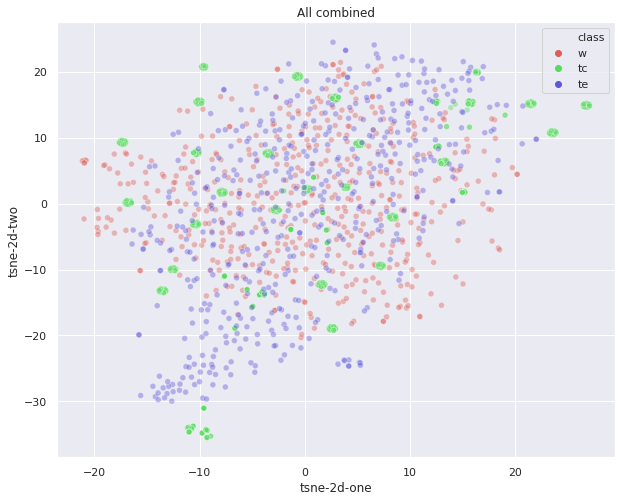

In [ ]:
plt.figure(figsize=(10,8))
plt.title("All combined")
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="class",
    palette=sns.color_palette("hls", 3),
    data=df_c,
    legend="full",
    alpha=0.4
)

In [ ]:
p,D=ks2d2s(df_t['tsne-2d-one'],df_w['tsne-2d-two'],df_te['tsne-2d-one'],df_te['tsne-2d-two'],extra='True')
print(p)
print(D)

1.17003043793801e-05
0.184


This is the two-sided K-S test. Small p-values means that the two samples are significantly different. Note that the p-value is only an approximation as the analytic distribution is unkonwn. The approximation is accurate enough when N > ~20 and p-value < ~0.20 or so. When p-value > 0.20, the value may not be accurate, but it certainly implies that the two samples are not significantly different. (cf. Press 2007)

In [ ]:
p,D=ks2d2s(df_t['tsne-2d-one'],df_t['tsne-2d-two'],df_te['tsne-2d-one'],df_te['tsne-2d-two'],extra='True')
print(p)
print(D)

0.0007079328953949444
0.14800000000000002


In [ ]:
p,D=ks2d2s(df_w['tsne-2d-one'],df_w['tsne-2d-two'],df_w['tsne-2d-one'],df_w['tsne-2d-two'],extra='True')
print(p)
print(D)

1.0
0.002


In [ ]:
p,D=ks2d2s(df_t['tsne-2d-one'],df_w['tsne-2d-two'],df_t['tsne-2d-one'],df_t['tsne-2d-two'],extra='True')
print(p)
print(D)

9.743156513468057e-05
0.16799999999999998


### **KL divergence**

In [ ]:
 from sklearn import preprocessing
 min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
r_scaled = min_max_scaler.fit_transform(r1)
p_scaled = min_max_scaler.fit_transform(p1)

In [ ]:
def kl_divergence(p, q):
	return sum(p[i] * np.log2(p[i]/(q[i]+1)) for i in range(len(p)))

In [ ]:
kl_divergence(r_scaled,p_scaled)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na